### Missing data

In the real world, missing data is a common issue. And there are three major reasons for the missingness of data.<br>

Think of a scenario where you are taking a survey to collect data from different age groups(15-65 maybe) about whether they are diabetic or not. And of course, the final data have some missing responses.

**1) MCAR(Missing Completely At Random)**<br>
In this case, if a respondent "forgot" to fill out the information whether they are diabetic or not diabetic leads to a missing value. This type of missingness is called MCAR, because, clearly, it is "truly missing". In other words, **The probability that the value is being missing depends only on itself**.<br>

**2) MAR(Missing at Random)**<br>
It is also a case where we may observe some missing values in the lower age group(15-25) because of many reasons, maybe they are concerned about their privacy etc. Here, the response is depending on age which means **The probability that the value is being missing depends only on observable data**.

**3) MNAR(Missing Not At Random)**<br>
If both MCAR and MAR fail, then it is MNAR. For the above scenario, suppose there are some missing values in the lower age group and the reason why they did not fill the form is because they are diabetic. They felt embarrassed or something. Here, **The probability that the value is being missing depends on both observable data and missed data**. 

However, it is difficult to explain the reason for missingness in most of the cases. Except you have the clear domain knowledge about that. Therefore, MAR is a standard assumption to be checked using several analysis. 


Usually, the following steps are practiced to deal with the missing data:
- Evaluate the type of Missingness. Is it MCAR, MAR, or MNAR?
    - If MCAR: Then you can simply remove the null values or use simple imputation methods as they don't depend on other variables.
    - If MAR: Be cautious and try not to introduce any bias by removing or imputing values.
    - If MNAR: May god bless you and try getting new data or more data.
- Identify the proportion of missing data. 
- Use multiple approaches to see what fits better. Some of them are:
     - Deletion methods
         - delete the entire sample. 
         - only delete the missing values of required sample(or subset of samples)
     - Single value imputation
         - replacing with Mean or Median
         - hot deck and cold deck
         - last value carried forward
     - Model based imputation
         - regression
         - K nearest neighbors
         - Multiple imputation

In this notebook, I tried different approaches to tackle with the univariate missing data.

#### The Steps:
1) A dataset with no null values is chosen. It serves as a ground truth.<br>
2) Introduced 20% and 40% null values to the dataset. <br>
3) Tried different approaches. <br>
4) Computed rmse to find the best apporach.<br>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import warnings


warnings.filterwarnings("ignore")

In [2]:
initial_df = pd.read_csv('diabetes.csv')

In [3]:
initial_df.shape

(768, 9)

In [4]:
initial_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
initial_df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
ground_df = pd.DataFrame(initial_df['BMI'])

In [7]:
twenty_df = ground_df.copy()
forty_df = ground_df.copy()

In [8]:
print(twenty_df.head())

    BMI
0  33.6
1  26.6
2  23.3
3  28.1
4  43.1


In [9]:
# Making 20 percentage of random values of the data as null values
arr1 = np.sort(np.random.choice(768,154,replace=False))
for i in arr1:
    twenty_df.iloc[[i]] = np.nan

In [10]:
# Making 40 percentage of random values of the data as null values
arr2 = np.sort(np.random.choice(768,307,replace=False))
for i in arr2:
    forty_df.iloc[[i]] = np.nan

In [11]:
# dropping null values
t_notmissing_df = twenty_df.dropna()
f_notmissing_df = forty_df.dropna()

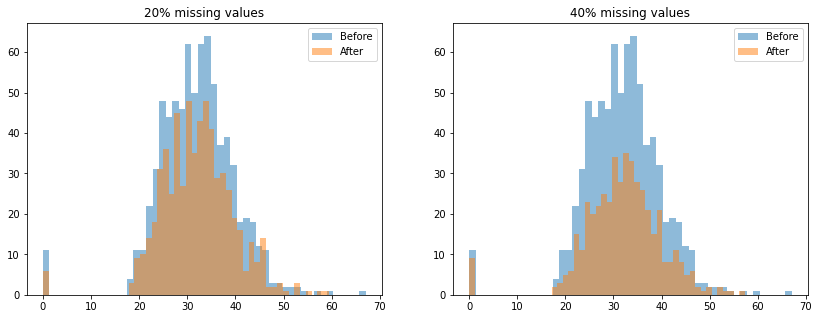

In [12]:
# Complete case analysis(simply dropping the null values)
plt.figure(figsize=(14,5))

ax1 = plt.subplot(1,2,1)
ax1.hist(ground_df,bins=50,alpha=0.5,label='Before') # 20% missing values
ax1.hist(t_notmissing_df,bins=50,alpha=0.5,label='After')
ax1.set_title('20% missing values')
plt.legend()

ax2 = plt.subplot(1,2,2)
ax2.hist(ground_df,bins=50,alpha=0.5,label='Before') # 40% missing values
ax2.hist(f_notmissing_df,bins=50,alpha=0.5,label='After')
ax2.set_title('40% missing values')
plt.legend()

well, most of us love to simply drop the null values but it just makes things worse, **you will lose the information by dropping the samples**. Try this method only if there is less percentage of missing values and also a huge dataset.

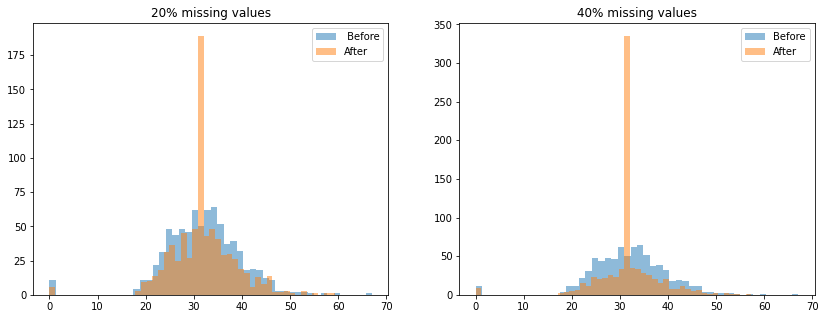

In [13]:
# Single value imputation:
# Replacing with Mean
t_mean_imputation = twenty_df.copy()
f_mean_imputation = forty_df.copy()

t_mean_imputation = t_mean_imputation.fillna(twenty_df.mean())
f_mean_imputation = f_mean_imputation.fillna(forty_df.mean())

plt.figure(figsize=(14,5))

ax1 = plt.subplot(1,2,1)
ax1.hist(ground_df,bins=50,alpha=0.5,label=' Before') # 20% missing values
ax1.hist(t_mean_imputation,bins=50,alpha=0.5,label='After')
ax1.set_title('20% missing values')
plt.legend()

ax2 = plt.subplot(1,2,2)
ax2.hist(ground_df,bins=50,alpha=0.5,label='Before') # 40% missing values
ax2.hist(f_mean_imputation,bins=50,alpha=0.5,label='After')
ax2.set_title('40% missing values')
plt.legend()

In [14]:
def rmse(y_actual,y_pred):
    error = y_pred-y_actual
    mse = (error**2).mean()
    return np.sqrt(mse)

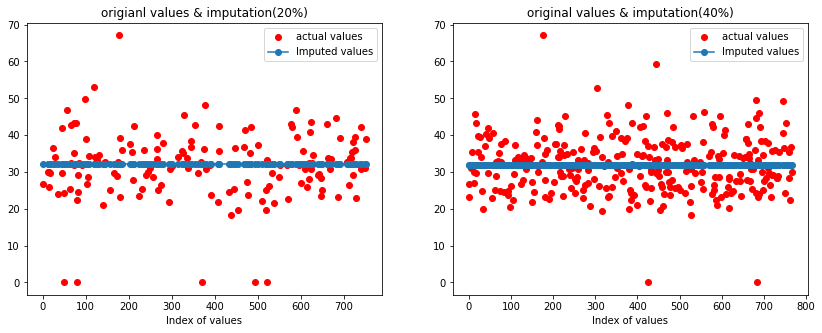

In [15]:
plt.figure(figsize=(14,5))

ax1 = plt.subplot(1,2,1)
ax1.plot(ground_df.iloc[arr1],'or',label='actual values') # 20% missing values
ax1.plot(t_mean_imputation.iloc[arr1],label='Imputed values',marker='o')
ax1.set_title('origianl values & imputation(20%)')
ax1.set_xlabel('Index of values')
plt.legend()

ax2 = plt.subplot(1,2,2)
ax2.plot(ground_df.iloc[arr2],'or',label='actual values') # 40% missing values
ax2.plot(f_mean_imputation.iloc[arr2],label='Imputed values',marker='o')
ax2.set_title('original values & imputation(40%)')
ax2.set_xlabel('Index of values')
plt.legend()

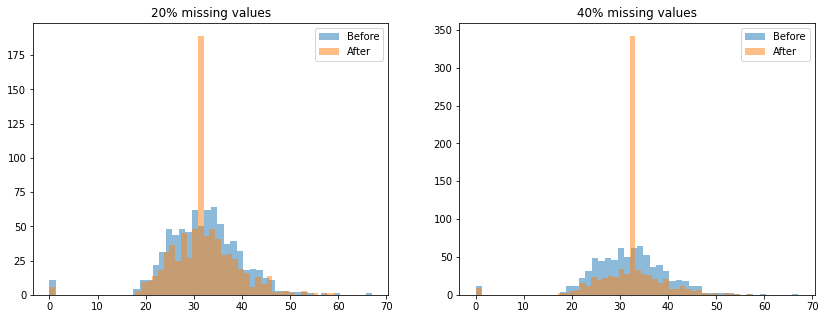

In [16]:
# Replacing with Median
t_median_imputation = twenty_df.copy()
f_median_imputation = forty_df.copy()

t_median_imputation = t_median_imputation.fillna(twenty_df.median())
f_median_imputation = f_median_imputation.fillna(forty_df.median())

plt.figure(figsize=(14,5))

ax1 = plt.subplot(1,2,1)
ax1.hist(ground_df,bins=50,alpha=0.5,label='Before') # 20% missing values
ax1.hist(t_median_imputation,bins=50,alpha=0.5,label='After')
ax1.set_title('20% missing values')
plt.legend()

ax2 = plt.subplot(1,2,2)
ax2.hist(ground_df,bins=50,alpha=0.5,label='Before') # 40% missing values
ax2.hist(f_median_imputation,bins=50,alpha=0.5,label='After')
ax2.set_title('40% missing values')
plt.legend()

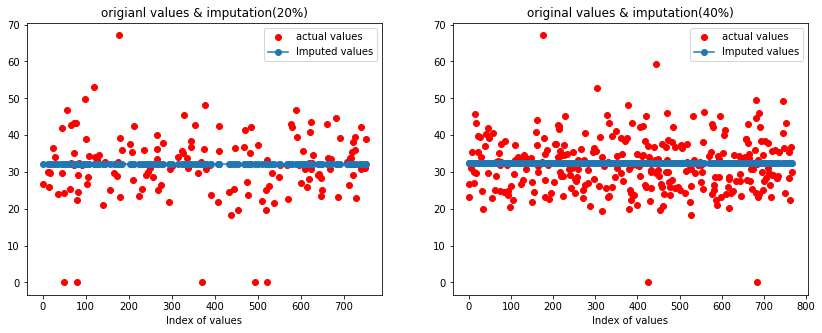

In [17]:
plt.figure(figsize=(14,5))

ax1 = plt.subplot(1,2,1)
ax1.plot(ground_df.iloc[arr1],'or',label='actual values') # 20% missing values
ax1.plot(t_median_imputation.iloc[arr1],label='Imputed values',marker='o')
ax1.set_title('origianl values & imputation(20%)')
ax1.set_xlabel('Index of values')
plt.legend()

ax2 = plt.subplot(1,2,2)
ax2.plot(ground_df.iloc[arr2],'or',label='actual values') # 40% missing values
ax2.plot(f_median_imputation.iloc[arr2],label='Imputed values',marker='o')
ax2.set_title('original values & imputation(40%)')
ax2.set_xlabel('Index of values')
plt.legend()

mean and median imputation **introduces heavy bias towards the mean/median values** as you can see from the histograms.

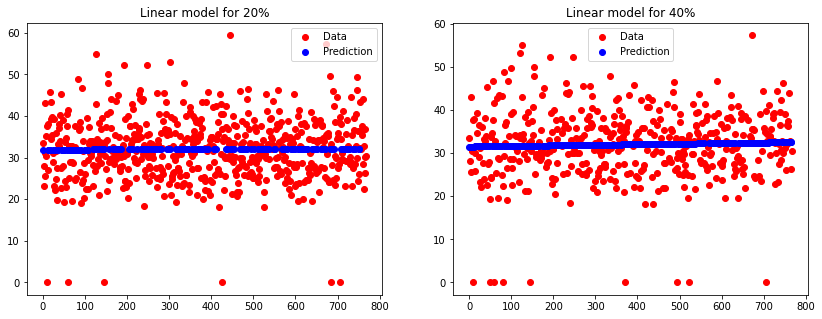

In [18]:
# Model based imputation:
# Linear regression


from sklearn.linear_model import LinearRegression


t_lr_missing_df = twenty_df[twenty_df['BMI'].isnull()]
f_lr_missing_df = forty_df[forty_df['BMI'].isnull()]

lr_model = LinearRegression()

t_lr_model=lr_model.fit(t_notmissing_df.index.values.reshape(-1, 1), t_notmissing_df['BMI'])
t_lr_missing_df['BMI'] = t_lr_model.predict(t_lr_missing_df.index.values.reshape(-1, 1))

f_lr_model = lr_model.fit(f_notmissing_df.index.values.reshape(-1,1),f_notmissing_df['BMI'])
f_lr_missing_df['BMI'] = f_lr_model.predict(f_lr_missing_df.index.values.reshape(-1,1))

t_lr_imputation = pd.concat([t_lr_missing_df,t_notmissing_df]).sort_index()
f_lr_imputation = pd.concat([f_lr_missing_df,f_notmissing_df]).sort_index()

# plot the original and predicted data
plt.figure(figsize=(14,5))
ax1 = plt.subplot(1,2,1)
ax1.scatter(t_notmissing_df.index, t_notmissing_df['BMI'], color='red', label='Data')
ax1.scatter(t_lr_missing_df.index, t_lr_missing_df['BMI'], color='blue', label='Prediction')
ax1.set_title('Linear model for 20%')
plt.legend()

ax2 = plt.subplot(1,2,2)
ax2.scatter(f_notmissing_df.index, f_notmissing_df['BMI'], color='red', label='Data')
ax2.scatter(f_lr_missing_df.index, f_lr_missing_df['BMI'], color='blue', label='Prediction')
ax2.set_title('Linear model for 40%')
plt.legend()

plt.show()

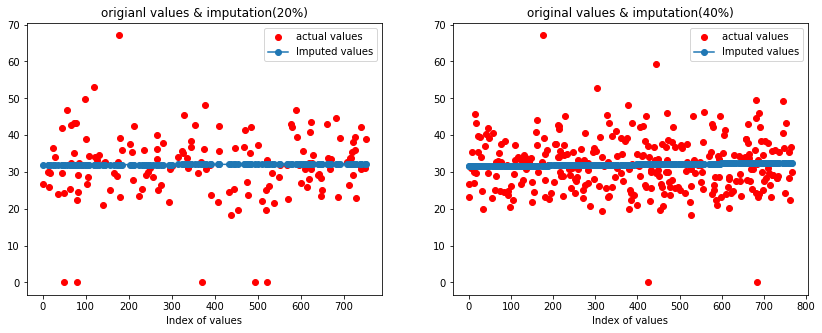

In [19]:
plt.figure(figsize=(14,5))

ax1 = plt.subplot(1,2,1)
ax1.plot(ground_df.iloc[arr1],'or',label='actual values') # 20% missing values
ax1.plot(t_lr_missing_df.loc[arr1],label='Imputed values',marker='o')
ax1.set_title('origianl values & imputation(20%)')
ax1.set_xlabel('Index of values')
plt.legend()

ax2 = plt.subplot(1,2,2)
ax2.plot(ground_df.iloc[arr2],'or',label='actual values') # 40% missing values
ax2.plot(f_lr_missing_df.loc[arr2],label='Imputed values',marker='o')
ax2.set_title('original values & imputation(40%)')
ax2.set_xlabel('Index of values')
plt.legend()

Here, we just assume that the data obey linear relation and try to impute with the predictions from the linear regression model.

In [20]:
# KNN Imputation:
from sklearn.impute import KNNImputer

knn_imputer = KNNImputer(n_neighbors=5)
t_imputed_data= knn_imputer.fit_transform(twenty_df[['BMI']])
f_imputed_data = knn_imputer.fit_transform(forty_df[['BMI']])

t_knn_imputation = pd.DataFrame(t_imputed_data,columns=['BMI'])
f_knn_imputation = pd.DataFrame(f_imputed_data,columns=['BMI'])

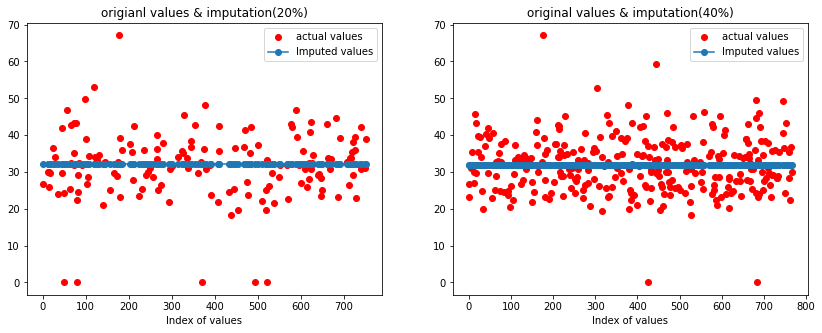

In [21]:
plt.figure(figsize=(14,5))

ax1 = plt.subplot(1,2,1)
ax1.plot(ground_df.iloc[arr1],'or',label='actual values') # 20% missing values
ax1.plot(t_knn_imputation.iloc[arr1],label='Imputed values',marker='o')
ax1.set_title('origianl values & imputation(20%)')
ax1.set_xlabel('Index of values')
plt.legend()

ax2 = plt.subplot(1,2,2)
ax2.plot(ground_df.iloc[arr2],'or',label='actual values') # 40% missing values
ax2.plot(f_knn_imputation.iloc[arr2],label='Imputed values',marker='o')
ax2.set_title('original values & imputation(40%)')
ax2.set_xlabel('Index of values')
plt.legend()

In [22]:
print('**rmse for different approaches(20% mssing data)**')
print('mean imputation: ',rmse(ground_df,t_mean_imputation))
print('median imputation: ',rmse(ground_df,t_median_imputation))
print('linear regression imputation: ',rmse(ground_df,t_lr_imputation))
print('knn imputation: ',rmse(ground_df,t_knn_imputation))
print('**rmse for different approaches(40% missing data)**')
print('mean imputation: ',rmse(ground_df,f_mean_imputation))
print('median imputation: ',rmse(ground_df,f_median_imputation))
print('linear regression imputation: ',rmse(ground_df,f_lr_imputation))
print('knn imputation: ',rmse(ground_df,f_knn_imputation))

**rmse for different approaches(20% mssing data)**
mean imputation:  BMI    4.180117
dtype: float64
median imputation:  BMI    4.180016
dtype: float64
linear regression imputation:  BMI    4.179607
dtype: float64
knn imputation:  BMI    4.180117
dtype: float64
**rmse for different approaches(40% missing data)**
mean imputation:  BMI    4.775766
dtype: float64
median imputation:  BMI    4.783428
dtype: float64
linear regression imputation:  BMI    4.784283
dtype: float64
knn imputation:  BMI    4.775766
dtype: float64


Here, following any of the methods does not make any noticeable change because of the approximately same rmse for several methods.

#### Things I didn't do because I was lazy but you should probably try:
- In **The steps** mentioned at the beginning, you can actually try introducing 5% - 50% null values with 5% increment to really witness that best approach changes for different proportion of missing data.
- You can take different batch of missing data at a time and compute the average rmse.
- Try imputing the null values with the previous non null value.
- Try extending this to multivariate dataset.
- multiple value imputation, hot deck,cold deck imputation for multivariate dataset.